In [4]:
import matplotlib.pylab as plt
%matplotlib inline

import yt
from yt import YTArray, YTQuantity
import trident
import numpy as np
import sys
import h5py as h5

import palettable
from matplotlib.colors import LogNorm, ListedColormap


sys.path.append('../analysis')
import spectrum_generating_tools as spg
import plotting_tools as pt


In [422]:
ds, gcenter, bv = spg.load_simulation_properties('P0_agncr')
ad = ds.sphere(gcenter, (250, 'kpc'))
print(ad.quantities.bulk_velocity().in_units('km/s'))
print(bv)

yt : [INFO     ] 2021-02-16 14:16:44,180 Parameters: current_time              = 3.398869692888919e+17 s
yt : [INFO     ] 2021-02-16 14:16:44,181 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-16 14:16:44,182 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-16 14:16:44,182 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-16 14:16:44,183 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-16 14:16:44,183 Parameters: current_redshift          = 0.24979488244391623
yt : [INFO     ] 2021-02-16 14:16:44,184 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-16 14:16:44,184 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-16 14:16:44,185 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-16 14:16:44,185 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-16 14:16:44,192 Allocating for 1.506e+06 p

[  80.59099507 -238.66698573  -67.04779675] km/s
[  74.98331176 -240.71723683  -67.77556155] km/s


yt : [INFO     ] 2021-02-16 14:23:09,259 Parameters: current_time              = 3.398869692888919e+17 s
yt : [INFO     ] 2021-02-16 14:23:09,260 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-16 14:23:09,261 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-16 14:23:09,262 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-16 14:23:09,262 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-16 14:23:09,263 Parameters: current_redshift          = 0.24979488244391623
yt : [INFO     ] 2021-02-16 14:23:09,263 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-16 14:23:09,263 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-16 14:23:09,264 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-16 14:23:09,264 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-16 14:23:09,273 Allocating for 1.506e+06 p


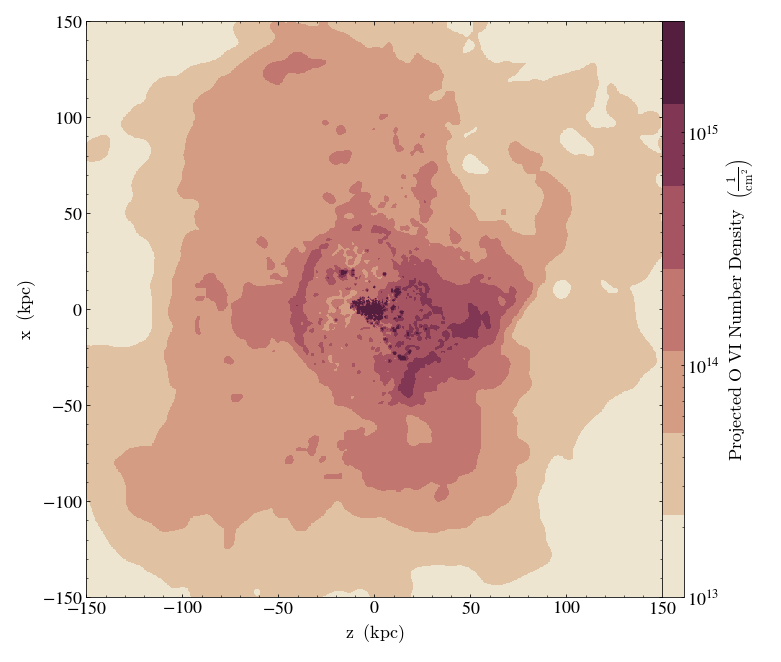

In [432]:
ds, gcenter, bv = spg.load_simulation_properties('P0_agncr')

#ad = ds.sphere(gcenter, (250, 'kpc'))
left_edge = gcenter - YTArray([250, 250, 250], 'kpc')
right_edge = gcenter + YTArray([250, 250, 250], 'kpc')

ad = ds.region(gcenter, left_edge, right_edge )
s = yt.ProjectionPlot(ds, 'y', ('gas', 'O_p5_number_density'), center = gcenter, 
                      width = (300, 'kpc'), weight_field = None, data_source = ad)
s.set_zlim(('gas', 'O_p5_number_density'), 1e13, 3e15)
cmap_ovi = ListedColormap(palettable.cartocolors.sequential.BrwnYl_7.mpl_colors)
s.set_cmap(('gas', 'O_p5_number_density'), cmap_ovi)
s.show()

In [22]:
ds, gcenter, bulk_velocity = ds, gcenter, bv = spg.load_simulation_properties('P0')
code_unit_conversion = ds.domain_right_edge.d / ds.domain_right_edge.in_units('kpc').d

gcenter_kpc = [cx[0], cy[0], cz[0]]  # assuming galaxy center is the same for all sightlines
print(gcenter, gcenter_kpc)
gcenter = gcenter_kpc * code_unit_conversion
bulk_velocity = YTArray([bvx[0], bvy[0], bvz[0]], 'km/s')

yt : [INFO     ] 2021-02-11 16:22:10,866 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-02-11 16:22:10,867 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-11 16:22:10,867 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-11 16:22:10,868 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-11 16:22:10,869 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-11 16:22:10,869 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-02-11 16:22:10,870 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-11 16:22:10,870 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-11 16:22:10,870 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-11 16:22:10,871 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-11 16:22:10,891 Allocating for 3.151e+07 p

[-16933.77317667 -12009.28144633   5305.25448309] kpc [-16933.77, -12009.28, 5305.254]


In [23]:
ray_data_file = '../../data/unanalyzed_spectra/P0_z0.25_ray_data.dat'
print(ray_data_file)
ray_id_list, impact, bvx, bvy, bvz, xi, yi, zi, xf, yf, zf, cx, cy, cz =\
    np.loadtxt(ray_data_file, skiprows = 1, unpack = True)

ray_start_list = np.ndarray(shape=(0, 3))
ray_end_list = np.ndarray(shape=(0, 3))
for i in range(len(xi)):
    ray_start_list = np.vstack((ray_start_list, [xi[i], yi[i], zi[i]] * code_unit_conversion))
    ray_end_list   = np.vstack((ray_end_list,   [xf[i], yf[i], zf[i]] * code_unit_conversion))

../../data/unanalyzed_spectra/P0_z0.25_ray_data.dat


yt : [INFO     ] 2021-02-25 21:20:21,780 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-02-25 21:20:21,781 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-25 21:20:21,782 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-25 21:20:21,782 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-25 21:20:21,783 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-25 21:20:21,783 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-02-25 21:20:21,784 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-25 21:20:21,784 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-25 21:20:21,784 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-25 21:20:21,785 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-25 21:20:21,804 Allocating for 3.151e+07 p

NameError: name 'inset_axes' is not defined

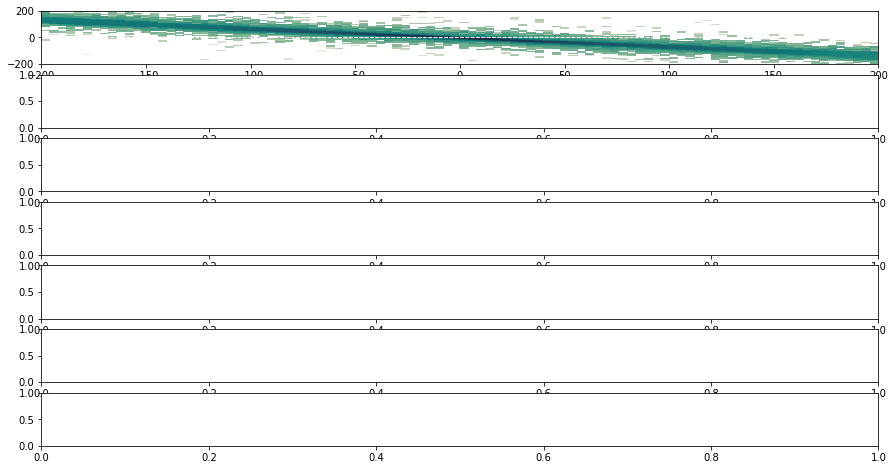

In [5]:
def los_vel(vx, vy, vz, bv = [0, 0, 0], normal = [0, 0, 1]):
    vx = np.array(vx - bv[0])
    vy = np.array(vy - bv[1])
    vz = np.array(vz - bv[2])
    #vel = np.column_stack((vx, vy, vz))

    normal_mag = np.linalg.norm(normal)
    normal = np.divide(normal, normal_mag)
    #normal = np.column_stack(normal)
    
    #print(vel.shape, normal.shape)
    #v_dot_norm = np.dot(vel, normal) 
    v_dot_norm = vx*normal[0] + vy*normal[1] + vz*normal[2]
   # print(v_dot_rhat.shape)
    return v_dot_norm
def load_sightline_scatter_data(sim, ray_id, output = 3195):
    plot_data = h5.File('../../data/unanalyzed_spectra/ray_%s_%i_%i.h5'%(sim, output, ray_id), 'r')['grid']

    l = YTArray(plot_data['l'], 'cm')
    l = np.array(l.in_units('kpc'))
    #l -= l[0]
    temperature = np.array(plot_data['temperature'])
    density     = np.array(plot_data['density'])
    metallicity = np.array(plot_data['metallicity'])*77.22007722007721  # converting from code units to zsun
    vx          = np.array(plot_data['relative_velocity_x']) / 1e5 # converting to km/s
    vy          = np.array(plot_data['relative_velocity_y']) / 1e5 # converting to km/s
    vz          = np.array(plot_data['relative_velocity_z']) / 1e5 # converting to km/s

    vlos        = np.array(plot_data['velocity_los']) / 1e5
    dl = np.array(plot_data['dl'])
    
    # O VI and H I column densities
    oden = np.array(plot_data['O_p5_number_density'])
    ocol  = np.cumsum(dl * np.array(oden))
    sicol = np.cumsum(dl* np.array(plot_data['Si_p3_number_density']))
    hcol  = np.cumsum(dl * np.array(plot_data['H_p0_number_density']))
    
    
    return l, np.log10(temperature), np.log10(density), np.log10(metallicity), vlos, np.log10(ocol), np.log10(sicol), np.log10(oden)
    
    
field_list = ['density', 'temperature', 'metallicity', 'velocity_los',  'O_p5_mass', 'Si_p2_mass', 'H_p0_mass']
unit_list = ['g/cm**3', 'K', 'Zsun', 'km/s', 'Msun', 'Msun', 'Msun']
ylim_list = [(-29, -25.5), (4.7, 6.1), (-3.5, -.3), (-200, 200), (12, 15), (12, 16), (12, 21)]
zlim_list  = [(3e-29, 1e-25), (8e4, 1e6), (3e-3, 1), (-200, 200), (1e13, 3e15),
              (1e13, 3e16), (1e13, 1e21)]
ylabel_list = ['Density (g cm$^{-3}$)', 'Temperature (K)', 'Metallicity ($Z_{\odot}$)', 
                    'LOS Velocity (km/s)', 'O VI Mass', 'Si III Mass', 'H I Mass']
               #'O VI Column Density (cm$^{-2}$)',
                #   'Si III Column Density (cm$^{-2}$)', 'H I Column Density (cm$^{-2}$)']


def plot_ray_image(model, ray_id):
    ds, gcenter, bv = spg.load_simulation_properties(model)

    # load ray positions
    ray_data_file = '../../data/unanalyzed_spectra/%s_z0.25_ray_data.dat'%model
    xi, yi, zi, xf, yf, zf =\
            np.loadtxt(ray_data_file, skiprows = 1, unpack = True, usecols = (5, 6, 7, 8, 9, 10))
    ray_start = ds.arr([xi[ray_id], yi[ray_id], zi[ray_id]], 'kpc')
    ray_end   = ds.arr([xf[ray_id], yf[ray_id], zf[ray_id]], 'kpc')
    ray_direction = ray_end - ray_start
    ray_center = ray_start + 0.5*ray_direction
    normal_vector = ds.arr(gcenter, 'kpc') - ray_center
   # normal_vector = np.cross(normal_vector, ray_direction)

    l, temperature, density, metallicity, vlos, ocol, sicol, hcol = \
        load_sightline_scatter_data(model, ray_id)
    scatter_field_list = [ density, temperature, metallicity, vlos, ocol, sicol, hcol]
    
    
    fig, ax = plt.subplots(nrows = 7, ncols =1, figsize = (15, 8))
    
    s = ds.cutting(normal_vector, ray_center)
    xcut = s[('gas', 'relative_x')].in_units('kpc')
    ycut = s[('gas', 'relative_y')].in_units('kpc')
    zcut = s[('gas', 'relative_z')].in_units('kpc')  
    xlims = (-200, 200)
    ylims = (-200, 200)
    normed = False
    nbins = 100
    # first calculate how many cells / particls in each bin to divide out later
    divide_factor, xedges, yedges = np.histogram2d(xcut, ycut, range = [xlims, ylims], bins = nbins,
                                       weights = s[('gas', 'ones')], normed = normed)
    
    for i, field in enumerate(field_list):  
        if field == 'velocity_los':
            V = s[('Gas', 'Velocities')].in_units(unit_list[i])
            vx = V[:, 0].d
            vy = V[:, 1].d 
            vz = V[:, 2].d 
       
            vlos = los_vel(vx, vy, vz, bv = spg.load_bulk_velocity(model), normal = ray_direction)
            norm = None
            image, xedges, yedges = np.histogram2d(xcut, ycut, range = [xlims, ylims], bins = nbins,
                                       weights = vlos, normed = normed)
        else:
            image, xedges, yedges = np.histogram2d(xcut, ycut, range = [xlims, ylims], bins = nbins,
                                       weights = s[('gas', field)].in_units(unit_list[i]), normed = normed)
            norm = LogNorm()
            
        image /= divide_factor
        X, Y = np.meshgrid(xedges, yedges)
        cmap = pt.get_cmap(field)
        
        background = pt.get_palette(field)[0]
        if i > 3:
            ax[i].set_facecolor(background)
        im = ax[i].pcolormesh(X, Y, image.T, norm = norm, cmap = cmap)#,
#                              vmin = zlim_list[i][0], vmax = zlim_list[i][1])
        ax[i].axhline(0, linewidth = 1, color = 'white', linestyle = 'dashed')

        cbax = inset_axes(ax[i], width = "30%", height = "13%", loc = 6)
        cbar = fig.colorbar(im, cax=cbax, orientation = 'horizontal')
        cbar.ax.set_title(ylabel_list[i], color = 'black')
        
        
        # scatter data        
        data_xrange = 500.
        plot_xrange = 1200.
        
        data_yrange = np.abs(ylim_list[i][1] - ylim_list[i][0])
        plot_yrange = 20.
        
        # convert data to image units
        data = scatter_field_list[i]
        mask = (data > ylim_list[i][0]) & (data < ylim_list[i][1])
        x = l[mask] - 250 # centering ray on 0; lengthof ray is 500 kpc
        y = (data[mask] - ylim_list[i][0]) * plot_yrange / data_yrange - 10

        ax[i].scatter(x, y, color = 'white')
        
        if i < len(field_list) -1:
            ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlim(-150, 150)
        ax[i].set_ylim(-10, 10)

    ax[-1].set_xlabel('Lightray Trajectory')
    
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    #plt.savefig('../../plots/ray_P0_3195_%i.png'%ray_id, dpi = 300)
    plt.savefig('test2.png', dpi= 300)
    
plot_ray_image('P0', 5)

yt : [INFO     ] 2021-02-12 15:01:23,865 xlim = 0.129251 0.136749
yt : [INFO     ] 2021-02-12 15:01:23,866 ylim = -0.427001 -0.419502
yt : [INFO     ] 2021-02-12 15:01:23,868 xlim = 0.129251 0.136749
yt : [INFO     ] 2021-02-12 15:01:23,869 ylim = -0.427001 -0.419502
yt : [INFO     ] 2021-02-12 15:01:23,880 Making a fixed resolution buffer of (('gas', 'Si_p2_number_density')) 800 by 800



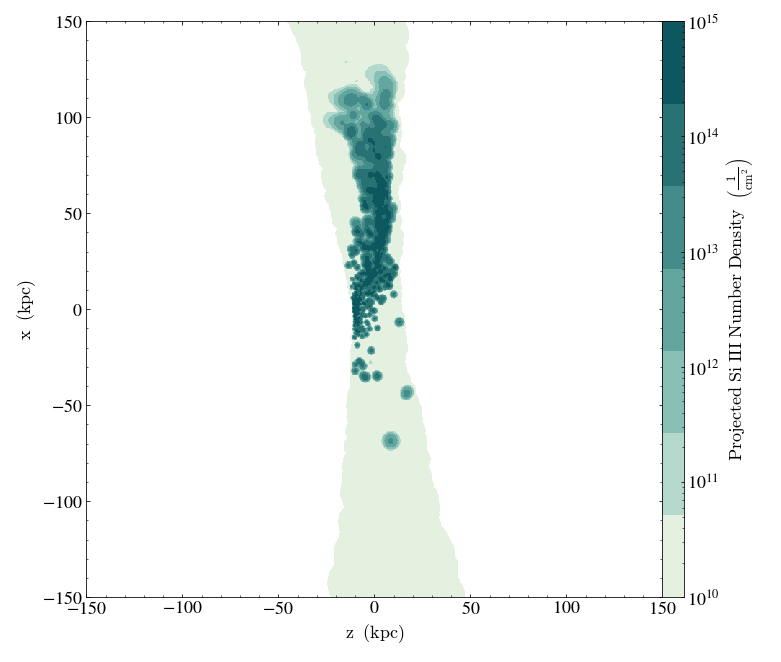

In [141]:
disk = ds.disk(ray_center, ray_direction, radius, height, ds = ds)#, fields = ('gas', 'density'))
#disk[('gas', 'Si_p3_number_density')]
field = ('gas', 'Si_p2_number_density')
p = yt.ProjectionPlot(ds, 'y', field, center = ray_center, 
                     width =(300, 'kpc'), weight_field = None, data_source = disk)
p.set_cmap(field, pt.get_cmap(field[1]))
p.set_zlim(field, 1e10, 1e15)
p.show()